In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
Y=df['Outcome']
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [10]:
X=df.drop(['Outcome'],axis='columns')
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
289,5,108,72,43,75,36.1,0.263,33
328,2,102,86,36,120,45.5,0.127,23
394,4,158,78,0,0,32.9,0.803,31
321,3,112,74,30,0,31.6,0.197,25
326,1,122,64,32,156,35.1,0.692,30
...,...,...,...,...,...,...,...,...
579,2,197,70,99,0,34.7,0.575,62
502,6,0,68,41,0,39.0,0.727,41
537,0,57,60,0,0,21.7,0.735,67
196,1,105,58,0,0,24.3,0.187,21


In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

Y_predict=lr.predict(X_test)

for i in range(len(Y_predict)):
    if Y_predict[i]<0.5:
        Y_predict[i]=0
    else:
        Y_predict[i]=1
        
print("the first five predicted values are :")
print(Y_predict[0:5])
print("the first five test values are :")
print(np.array(Y_test[0:5]))

the first five predicted values are :
[0. 1. 1. 0. 0.]
the first five test values are :
[0 1 1 0 1]


In [22]:
lr.coef_

array([ 0.02125018,  0.00550138, -0.00233104,  0.00043653, -0.00019935,
        0.01410673,  0.18992038,  0.00192842])

In [23]:
lr.intercept_

-0.8369410878179924

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_predict=knn.predict(X_test)
print("the first five predicted values are :")
print(Y_predict[0:5])
print("the first five test values are :")
print(np.array(Y_test[0:5]))

the first five predicted values are :
[0 1 0 0 0]
the first five test values are :
[0 1 1 0 1]


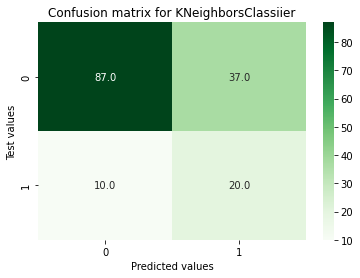

In [32]:
from sklearn import metrics
matrix=metrics.confusion_matrix(Y_predict,Y_test)
sns.heatmap(matrix,annot=True,cmap="Greens",fmt="0.1f")
plt.xlabel("Predicted values")
plt.ylabel("Test values")
plt.title("Confusion matrix for KNeighborsClassiier")
plt.show()